### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14,10
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Reading the Dataset

In [2]:
DF = pd.read_csv('indian_liver_patient.csv')

### Preprocessing of the data

In [3]:
DF.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
DF.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### Checking for null values

In [6]:
values = DF.isnull().sum().values/(len(DF)/100)
values = ['%.1f' % elem for elem in values]
print(values)

['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.7', '0.0']


### Replacing null values with mean

In [7]:
DF = DF.fillna(DF.mean())

### Checking for corelation among the attributes 

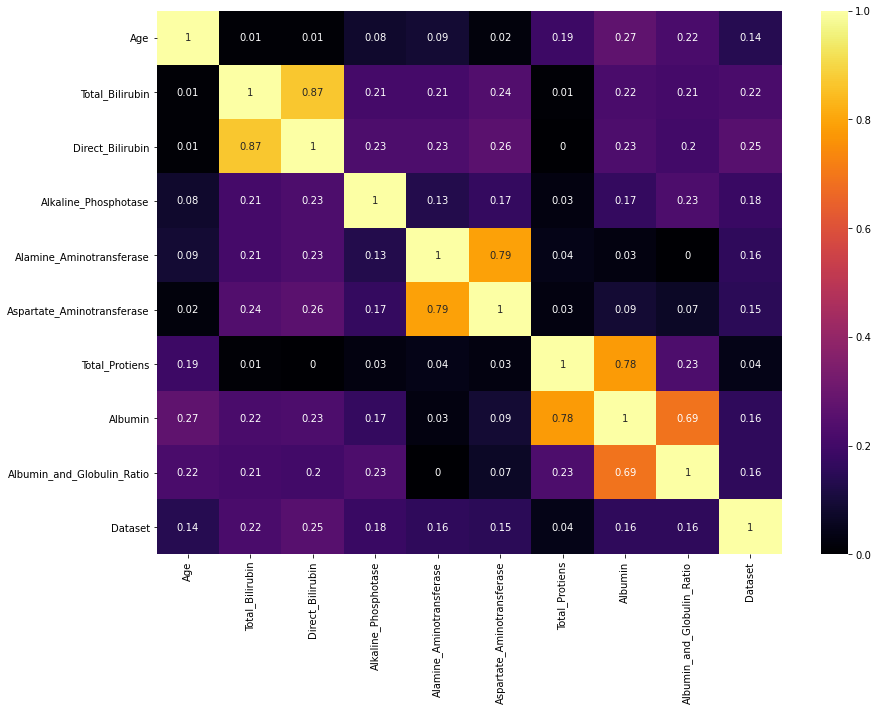

In [8]:
sns.heatmap(round(abs(DF.corr()),2), annot=True, cmap='inferno')

### Visualzing the Dataset


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000129524C9C70>,
      dtype=object)

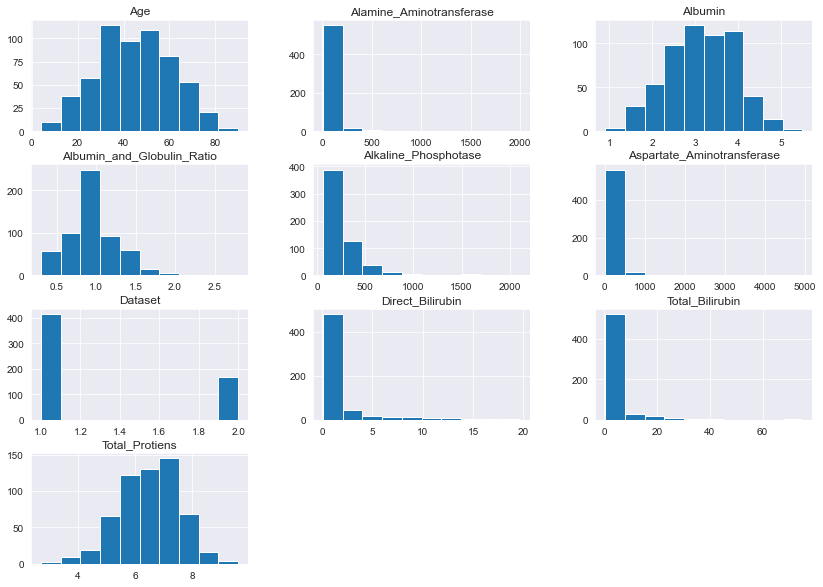

In [18]:
sns.set_style('darkgrid')
DF.hist()

## Logistic Regression 

In [10]:
X = DF.iloc[:,:-1]
y = DF.iloc[:,-1]

### Transforming categorical data into integers

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = DF.iloc[:,:-1]
X = np.array(ct.fit_transform(X))

### Splitting the data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 18)
print(X_train.shape, '\n', y_train.shape, '\n', X_test.shape, '\n', y_test.shape)

(437, 11) 
 (437,) 
 (146, 11) 
 (146,)


### Applying scaling 

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter = 10000)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=10000, random_state=0)

In [15]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
round(accuracy_score(y_test, y_pred)*100,2)

[[107   7]
 [ 25   7]]


78.08

In [16]:
y_pred = classifier.predict(X_train)

cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[272  30]
 [ 98  37]]


0.7070938215102975

## KNN

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 18)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = KNN(n_neighbors=3)
classifier.fit(X_train, y_train)


print("\nTraining Accuracy: \n\n")
y_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
print(cm)
print(accuracy_score(y_train, y_pred))


print("\nTesting Accuracy: \n\n")
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))


Training Accuracy: 


[[267  35]
 [ 39  96]]
0.8306636155606407

Testing Accuracy: 


[[93 21]
 [17 15]]
0.7397260273972602
